In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import cpu_count
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, HalvingGridSearchCV
from src.utils import load_data, initialize_model_pipeline, cross_validate_model
from sklearn.metrics import accuracy_score, classification_report
from os import cpu_count

In [3]:
data = pd.read_csv('../data/thea.csv')
X = data.drop('increase_stock', axis=1)
Y = data['increase_stock']
data.shape

(1600, 43)

In [4]:
bs_results = []
param_grid = {
    'max_depth': [7],
    'min_samples_split': [3, 5, 8],
    'criterion': ['gini', 'entropy']
}
for i in range(100):
    print(f'{i+1}/100')
    result = {}
    x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                        test_size=1/16,
                                                        random_state=i+1)

    kf = KFold(n_splits=150, shuffle=False)
    model = RandomForestClassifier(n_estimators=200)
    search = HalvingGridSearchCV(model, param_grid=param_grid, cv=kf,
                                 scoring='accuracy', n_jobs=cpu_count())
    search.fit(x_train, y_train)
    result['accuracy'] = accuracy_score(y_test, search.best_estimator_.predict(x_test))
    result['optimistic_accuracy'] = search.best_score_
    result['class_report'] = classification_report(y_test, search.best_estimator_.predict(x_test))
    result['best_params'] = search.best_params_
    result['model'] = search.best_estimator_
    bs_results.append(result)

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


In [5]:
results_df = pd.DataFrame(bs_results)
# results_df.to_pickle('../data/forest_optimal_results.pkl')
results_df

,accuracy,optimistic_accuracy,class_report,best_params,model
0,0.92,0.863333,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."
1,0.82,0.898333,precision recall f1-score ...,"{'criterion': 'entropy', 'max_depth': 7, 'min_...","(DecisionTreeClassifier(criterion='entropy', m..."
2,0.91,0.873333,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."
3,0.89,0.871667,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."
4,0.87,0.901667,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."
...,...,...,...,...,...
95,0.84,0.873333,precision recall f1-score ...,"{'criterion': 'entropy', 'max_depth': 7, 'min_...","(DecisionTreeClassifier(criterion='entropy', m..."
96,0.88,0.863333,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."
97,0.86,0.883333,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."
98,0.91,0.861667,precision recall f1-score ...,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...","(DecisionTreeClassifier(max_depth=7, max_featu..."


In [6]:
results_df.describe()

,accuracy,optimistic_accuracy
count,100.000000,100.000000
mean,0.873900,0.874800
std,0.031298,0.011066
min,0.780000,0.845000
25%,0.850000,0.868333
50%,0.880000,0.875000
75%,0.892500,0.881667
max,0.940000,0.901667


In [7]:
print(f'mew out of sample accuracy - mew optimistic accuracy = {np.mean(results_df["accuracy"] - results_df["optimistic_accuracy"])}')
results_df[['accuracy','optimistic_accuracy']].mean()

mew out of sample accuracy - mew optimistic accuracy = -0.0008999999999999975


accuracy               0.8739
optimistic_accuracy    0.8748
dtype: float64

In [8]:
# noinspection PyArgumentList
quantile_5 = np.percentile(results_df['accuracy'], 5, interpolation="linear")
# noinspection PyArgumentList
quantile_95 = np.percentile(results_df['accuracy'], 95, interpolation="linear")
print(f'~95% CI on out of sample accuracy [{quantile_5}, {quantile_95}]')

~95% CI on out of sample accuracy [0.82, 0.93]


Text(0.5, 1.0, 'Density: Out of Sample Accuracy vs. Optimistic Accuracy')

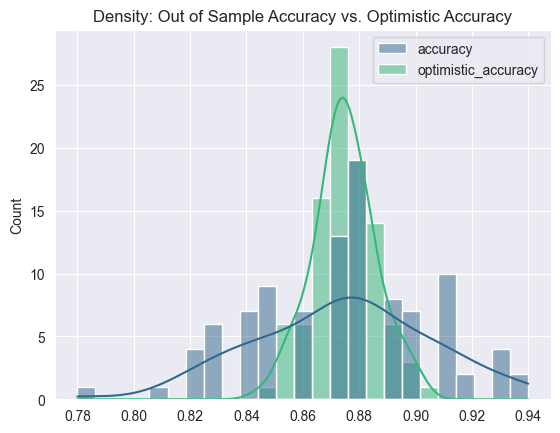

In [9]:
from seaborn import histplot
import matplotlib.pyplot as plt

histplot(data=results_df[['accuracy', 'optimistic_accuracy']], kde=True, palette='viridis')
plt.title('Density: Out of Sample Accuracy vs. Optimistic Accuracy')

In [15]:
hyper_params_df = pd.DataFrame(results_df['best_params'].tolist())
hyper_params_df.value_counts('criterion')

criterion
gini       68
entropy    32
Name: count, dtype: int64

In [ ]:
# Score: 0.875
# {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

# Score: 0.8796875
# {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

# Score: 0.8859375
# {'criterion': 'entropy', 'max_depth': 200, 'min_samples_split': 3}

# Score: 0.884375
# {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}